In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

따릉이대여소_마스터정보 = pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

강서_마스터정보 = 따릉이대여소_마스터정보[따릉이대여소_마스터정보['대여소_ID'].isin(강서_대여소_ID['대여소_ID'])]

강서_마스터정보 = 강서_마스터정보.reset_index()

강서_마스터정보 = 강서_마스터정보.drop('index',axis=1)

출퇴근_통합정보 = pd.read_csv('./출퇴근시간_대여소_이용량_통합 - 출퇴근시간_대여소_이용량.csv',encoding='utf-8')

출퇴근_통합정보 = 출퇴근_통합정보.drop('Unnamed: 0', axis=1)

출퇴근_통합정보.rename(columns={'대여소_ID':'대여소_ID',
                               '지구 분류(출근)':'지구분류(출)',
                               '지구 분류(퇴근)':'지구분류(퇴)',
                               '일치여부':'분류일치여부',
                               '강서_데이터_시작(출근)':'시작(출)',
                               '강서_데이터_종료(출근)':'종료(출)',
                               '차이(출근)':'차이(출)',
                               '차이 절대값(출근)':'차이절대값(출)',
                               '총 이용량(시작 + 종료)(출근)':'총이용량(출)',
                               '강서_데이터_시작(퇴근)':'시작(퇴)',
                               '강서_데이터_종료(퇴근)':'종료(퇴)',
                               '차이(퇴근)':'차이(퇴)',
                               '차이절대값(퇴근)':'차이절대값(퇴)',
                               '총 이용량(시작 + 종료)(퇴근)':'총이용량(퇴)'
                               }, inplace=True)

출퇴근_통합정보 = 출퇴근_통합정보.fillna(0)

출퇴근_통합정보['차이절대값합'] = 출퇴근_통합정보['차이절대값(출)'] + 출퇴근_통합정보['차이절대값(퇴)']

출퇴근_통합정보['총이용량합'] = 출퇴근_통합정보['총이용량(출)'] + 출퇴근_통합정보['총이용량(퇴)']

출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
0,ST-1062,주거,주거,일치,3817.0,2303.0,1514.0,1514.0,6120.0,4052,5420,-1368,1368,9472,2882.0,15592.0
1,ST-1063,업무,업무,일치,5061.0,8806.0,-3745.0,3745.0,13867.0,5762,3109,2653,2653,8871,6398.0,22738.0
2,ST-1064,업무,업무,일치,3900.0,8571.0,-4671.0,4671.0,12471.0,8962,5449,3513,3513,14411,8184.0,26882.0
3,ST-1065,주거,주거,일치,5849.0,5590.0,259.0,259.0,11439.0,14935,16778,-1843,1843,31713,2102.0,43152.0
4,ST-1067,주거,주거,일치,3604.0,2990.0,614.0,614.0,6594.0,2700,3810,-1110,1110,6510,1724.0,13104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344.0,1005.0,339.0,339.0,2349.0,1956,1923,33,33,3879,372.0,6228.0
191,ST-831,주거,주거,일치,2732.0,1538.0,1194.0,1194.0,4270.0,4079,4576,-497,497,8655,1691.0,12925.0
192,ST-834,업무,주거,불일치,3344.0,4368.0,-1024.0,1024.0,7712.0,6339,6460,-121,121,12799,1145.0,20511.0
193,ST-835,주거,주거,일치,4274.0,2164.0,2110.0,2110.0,6438.0,5497,7926,-2429,2429,13423,4539.0,19861.0


In [5]:
출퇴근_통합정보['temp_num'] = 출퇴근_통합정보.index.values+1

출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합,temp_num
0,ST-1062,주거,주거,일치,3817.0,2303.0,1514.0,1514.0,6120.0,4052,5420,-1368,1368,9472,2882.0,15592.0,1
1,ST-1063,업무,업무,일치,5061.0,8806.0,-3745.0,3745.0,13867.0,5762,3109,2653,2653,8871,6398.0,22738.0,2
2,ST-1064,업무,업무,일치,3900.0,8571.0,-4671.0,4671.0,12471.0,8962,5449,3513,3513,14411,8184.0,26882.0,3
3,ST-1065,주거,주거,일치,5849.0,5590.0,259.0,259.0,11439.0,14935,16778,-1843,1843,31713,2102.0,43152.0,4
4,ST-1067,주거,주거,일치,3604.0,2990.0,614.0,614.0,6594.0,2700,3810,-1110,1110,6510,1724.0,13104.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344.0,1005.0,339.0,339.0,2349.0,1956,1923,33,33,3879,372.0,6228.0,191
191,ST-831,주거,주거,일치,2732.0,1538.0,1194.0,1194.0,4270.0,4079,4576,-497,497,8655,1691.0,12925.0,192
192,ST-834,업무,주거,불일치,3344.0,4368.0,-1024.0,1024.0,7712.0,6339,6460,-121,121,12799,1145.0,20511.0,193
193,ST-835,주거,주거,일치,4274.0,2164.0,2110.0,2110.0,6438.0,5497,7926,-2429,2429,13423,4539.0,19861.0,194


대여소별 쏠림 정도 정렬 후 그래프 시각화 & 미분을 통한 급증 지점 시각화

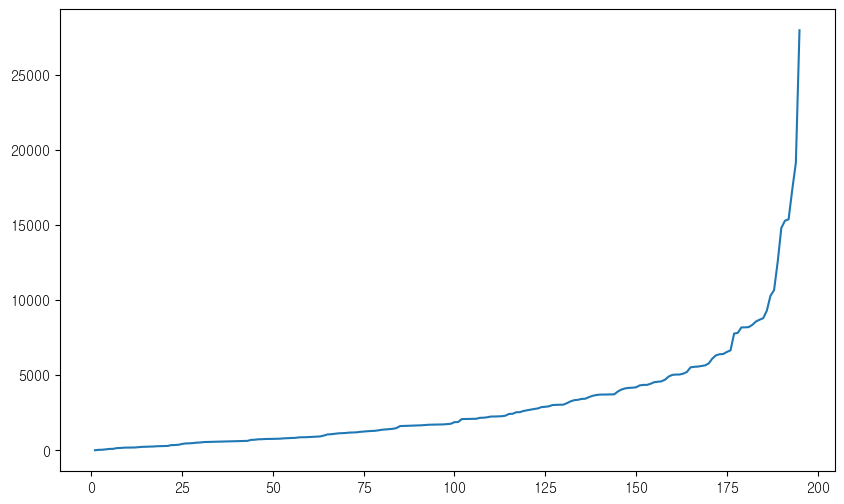

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(출퇴근_통합정보['temp_num'], 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합'])

In [7]:
import plotly.graph_objects as go

# 데이터 생성
x = 출퇴근_통합정보['temp_num']
y = 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

# 미분 진행
dx = x[1] - x[0]
dy = np.diff(y) / dx

line_color = '#336666'
line_color2 = '#33cc99'

# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, name='대여소별 쏠림 정도값', line=dict(color=line_color)))

fig.add_trace(go.Scatter(x=x[:-1], y=dy, mode='lines', name='데이터별 미분값', line=dict(color=line_color2)))

fig.update_layout(title='강서구 대여소 별 쏠림 정도 정렬 & 각 지점 미분')
fig.update_layout(xaxis_title='대여소 임시번호', yaxis_title='쏠림 정도')
fig.update_layout(width=800, height=600)

fig.show()

상위 20개 대여소 쏠림정도 비교 그래프 시각화

In [9]:
상위20대여소 = pd.read_csv('../../Data/따릉이/쏠림정도_top20_대여소.csv',encoding='utf-8')
강서_따릉이_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

In [14]:
출근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 600) & (강서_따릉이_데이터['기준_시간대'] <= 1000)]
퇴근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 1700) & (강서_따릉이_데이터['기준_시간대'] <= 2100)]

In [15]:
import plotly.graph_objects as go

x = 상위20대여소['대여소_ID']
y1 = 상위20대여소['대여-반납량_출근'].abs()
y2 = 상위20대여소['대여-반납량_퇴근'].abs()

bar_color = '#336666'
bar_color2 = '#33cc99'

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=y1, name='대여-반납량(출근)', marker=dict(color=bar_color)))
fig.add_trace(go.Bar(x=x, y=y2, name='대여-반납량(퇴근)', marker=dict(color=bar_color2)))

fig.update_layout(title='상위 20개 대여소 비교', xaxis_title='대여소 ID', yaxis_title='대여-반납량의 절대값')

fig.update_layout(width=800, height=600)
fig.show()

In [16]:
import plotly.graph_objects as go

x = 상위20대여소['대여소_ID']
y1 = 상위20대여소['차이절대값합']

bar_color = '#336666'

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=y1, name='쏠림정도 수치화',marker=dict(color=bar_color)))

fig.update_layout(title='상위 20개 대여소 비교', xaxis_title='대여소 ID', yaxis_title='쏠림정도 수치화')

fig.update_layout(width=800, height=600)
fig.show()